# Shift variance in the DWT domain

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt

In [5]:
%%bash

# Create the two images ("/tmp/moving_circle_000.png" and "/tmp/moving_circle_001.png") with a circle
# of diameter 10 that moves from coordinate (20,30) to (21,30).
/home/vruiz/MRVC/tools/moving_circle.sh -w 128 -h 128 -x 20 -y 30 -d 10 -f 2
mv /tmp/moving_circle_000.png .
mv /tmp/moving_circle_001.png .

/home/vruiz/MRVC/tools/moving_circle.sh: parsing: -w 128 -h 128 -x 20 -y 30 -d 10 -f 2
image_width = 128
image_height = 128
Initial X coordinate = 20
Initial Y coordinate = 30
diameter = 10
frames = 2


+ i=0
+ '[' 0 -le 1 ']'
++ printf %03d 0
+ ii=000
+ convert -size 128x128 xc:skyblue -fill white -stroke black -draw 'circle 20,30 30,30' /tmp/moving_circle_000.png
+ i=1
+ '[' 1 -le 1 ']'
++ printf %03d 1
+ ii=001
+ convert -size 128x128 xc:skyblue -fill white -stroke black -draw 'circle 21,30 31,30' /tmp/moving_circle_001.png
+ i=2
+ '[' 2 -le 1 ']'


In [6]:
def normalize(img):
    max_component = np.max(img)
    min_component = np.min(img)
    max_min_component = max_component - min_component
    return (img-min_component)/max_min_component

def show_img(prefix):
    img = load_img(prefix)
    img = normalize(img)
    plt.figure(figsize=(10,10))
    plt.title(prefix, fontsize=20)
    plt.imshow(img)
    
def load_frame(prefix):
    fn = f"{prefix}.png"
    print(fn)
    frame = cv2.imread(fn, cv2.IMREAD_UNCHANGED) # [rows, columns, components]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = np.array(frame)
    frame = frame.astype(np.float32) - 32768.0
    return frame

def write_frame(frame, prefix):
    frame = frame.astype(np.float32)
    frame += 32768.0
    frame = frame.astype(np.uint16)
    cv2.imwrite(f"{prefix}.png", frame)

def show_seq(prefix="/tmp/", frames=5):
    for i in range(frames):
        show_img(f"{prefix}{i:03d}")

def show_motion(prefix="/tmp/", frames=5):
    plt.figure(figsize=(10,10))
    prev = load_frame(f"{prefix}000")
    imgplot = plt.imshow(normalize(prev))
    for i in range(1, frames, 1):
        img = load_frame(f"{prefix}{i:03d}")
        diff = img - prev
        prev = img
        diff = normalize(diff)
        plt.figure(figsize=(10,10))
        plt.title(f"{prefix}{i:03d}", fontsize=20)
        plt.imshow(diff)

moving_circle_000.png
moving_circle_001.png


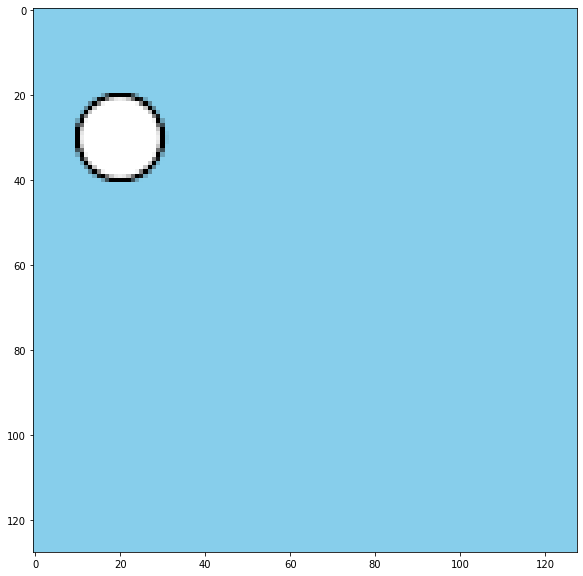

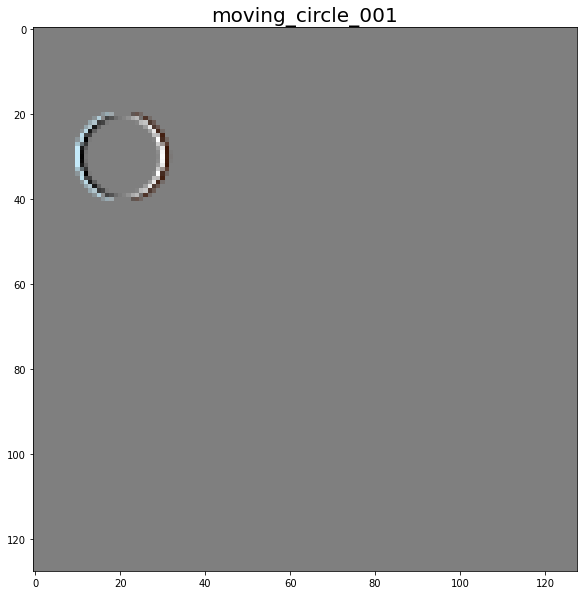

In [7]:
prefix = "moving_circle_"
show_motion(prefix, frames=2)

In [8]:
def RGB_to_YCoCg(RGB_frame):
    R, G, B = RGB_frame[:,:,0], RGB_frame[:,:,1], RGB_frame[:,:,2]
    YCoCg_frame = np.empty_like(RGB_frame)
    YCoCg_frame[:,:,0] =  R/4 + G/2 + B/4 
    YCoCg_frame[:,:,1] =  R/2       - B/2
    YCoCg_frame[:,:,2] = -R/4 + G/2 - B/4
    return YCoCg_frame

In [12]:
frame_0 = load_frame(prefix + "000")
frame_1 = load_frame(prefix + "001")
write_frame(frame_1-frame_0, "difference")

moving_circle_000.png
moving_circle_001.png


In [ ]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]

In [ ]:
# Plot the first part (from pixel 0 to 39) of the horizontal line (row 35) of the luminance.
plt.plot(frame_0_Y[35, 0:40])
#plt.show()
plt.plot(frame_1_Y[35, 0:40], linestyle=':')
plt.savefig("movement.svg")
plt.savefig("movement.pdf")
plt.show()

In [ ]:
decomposition_0_haar = pywt.dwt2(frame_0_Y, 'haar')
decomposition_1_haar = pywt.dwt2(frame_1_Y, 'haar')

In [ ]:
plt.title("Coefs in LL (Haar)")
plt.plot(decomposition_0_haar[0][18, 0:20])
plt.plot(decomposition_1_haar[0][18, 0:20], linestyle=':')
plt.savefig("haar_LL.svg")
plt.savefig("haar_LL.pdf")
plt.show()

In [ ]:
decomposition_0_db5 = pywt.dwt2(frame_0_Y, 'db5')
decomposition_1_db5 = pywt.dwt2(frame_1_Y, 'db5')

In [ ]:
plt.title("Coefs in LL (Daubechies 5)")
plt.plot(decomposition_0_db5[0][18, 0:20])
plt.plot(decomposition_1_db5[0][18, 0:20], linestyle=':')
plt.savefig("db5_LL.svg")
plt.savefig("db5_LL.pdf")
plt.show()

In [ ]:
decomposition_0_bior35 = pywt.dwt2(frame_0_Y, 'bior3.5')
decomposition_1_bior35 = pywt.dwt2(frame_1_Y, 'bior3.5')

In [ ]:
plt.title("Coefs in LL (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[0][18, 0:20])
plt.plot(decomposition_1_bior35[0][18, 0:20], linestyle=':')
plt.savefig("bior35_LL.svg")
plt.savefig("bior35_LL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in LH (Haar)")
plt.plot(decomposition_0_haar[1][0][18, 0:20])
plt.plot(decomposition_1_haar[1][0][18, 0:20], linestyle=':')
plt.savefig("haar_LH.svg")
plt.savefig("haar_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in LH (Daubechines 5)")
plt.plot(decomposition_0_db5[1][0][18, 0:20])
plt.plot(decomposition_1_db5[1][0][18, 0:20], linestyle=':')
plt.savefig("db5_LH.svg")
plt.savefig("db5_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in LH (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][0][18, 0:20])
plt.plot(decomposition_1_bior35[1][0][18, 0:20], linestyle=':')
plt.savefig("bior35_LH.svg")
plt.savefig("bior35_LH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Haar)")
plt.plot(decomposition_0_haar[1][1][18, 0:20])
plt.plot(decomposition_1_haar[1][1][18, 0:20], linestyle=':')
plt.savefig("haar_HL.svg")
plt.savefig("haar_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Daubechines 5)")
plt.plot(decomposition_0_db5[1][1][18, 0:20])
plt.plot(decomposition_1_db5[1][1][18, 0:20], linestyle=':')
plt.savefig("db5_HL.svg")
plt.savefig("db5_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HL (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][1][18, 0:20])
plt.plot(decomposition_1_bior35[1][1][18, 0:20], linestyle=':')
plt.savefig("bior35_HL.svg")
plt.savefig("bior35_HL.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Haar)")
plt.plot(decomposition_0_haar[1][2][18, 0:20])
plt.plot(decomposition_1_haar[1][2][18, 0:20], linestyle=':')
plt.savefig("haar_HH.svg")
plt.savefig("haar_HH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Daubechines 5)")
plt.plot(decomposition_0_db5[1][2][18, 0:20])
plt.plot(decomposition_1_db5[1][2][18, 0:20], linestyle=':')
plt.savefig("db5_HH.svg")
plt.savefig("db5_HH.pdf")
plt.show()

In [ ]:
plt.title("Coefs in HH (Biorthogonal 3.5)")
plt.plot(decomposition_0_bior35[1][2][18, 0:20])
plt.plot(decomposition_1_bior35[1][2][18, 0:20], linestyle=':')
plt.savefig("bior35_HH.svg")
plt.savefig("bior35_HH.pdf")
plt.show()